# Importing required libraries

In [6]:
import numpy as np
import pandas as pd

# Reading the data files

In [7]:
path = '../../data/VaginalPressureData/VaginalPressure/Data/'
dataA = pd.read_csv(path + 'A.csv', header=0, sep=',')
dataB = pd.read_csv(path + 'B.csv', header=0, sep=',')

# Getting an overview of the data

In [8]:
# Displays the column headers and 5 first columns, useful to see if the data loaded correctly.
dataA.head()

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,junosYHeight,obstacleXDistance,timeInmsec
0,738,772,777,777,777,771,773,775,483,1235,273
1,738,772,777,777,777,771,773,775,483,1210,392
2,738,772,777,777,777,771,773,775,483,1190,515
3,738,772,777,777,777,771,773,775,483,1170,616
4,738,772,777,777,777,771,773,775,483,1140,755


# Plotting a time series

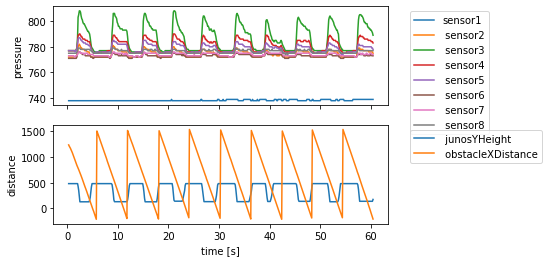

In [38]:
import matplotlib.pyplot as plt

# Looking at the header above, the first 8 columns are sensor readings,
sensors = dataA.columns[:8]

# .. and the next two are some dependent variables or system response
game_params = dataA.columns[8:10]

# .. and the final column shows the time of recording for each variable (in ms)
time_step =  dataA.columns[-1]
t_A = dataA[time_step] / 1000 # time in seconds

fig, axs = plt.subplots(2, sharex=True)
# Plot sensor readings wrt. time of recording
for sensor in sensors:
    axs[0].plot(t_A, dataA[sensor], label=sensor)

# Plot dependent variables
for p in game_params:
    axs[1].plot(t_A, dataA[p], label=p)

# Metadata
axs[0].legend(loc='upper left',bbox_to_anchor=(1.05, 1))
axs[1].legend(loc='upper left',bbox_to_anchor=(1.05, 1))

axs[0].set_ylabel('pressure')
axs[1].set_ylabel('distance')
axs[1].set_xlabel('time [s]')

plt.show()

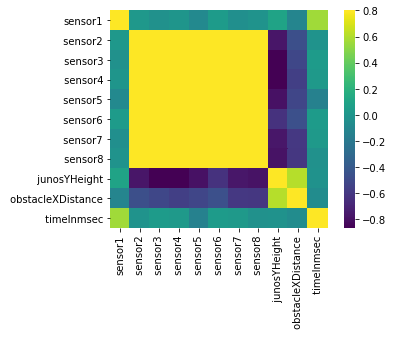

In [39]:
import seaborn as sns
# Dropping "Overall rank" as it has the same information as "Score"
corrmat = dataA.corr()
sns.heatmap(corrmat, vmax=.8, square=True, cmap="viridis");